<a href="https://colab.research.google.com/github/Vitali-Matteo/AXO/blob/main/image_compression_randomized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reandomized SVD

We start from matrix $A \in \mathbb{R}^{m\times n}$ where $m$ is the number of features and $n$ are the datapoints.

We build a matrix $P\in \mathbb{R}^{n\times k}$ where $k$ is the target rank, typically gaussian.

Then, we multiply $A$ and $P$, obtaining $Z\in \mathbb{R}^{m \times k}$. Now, we perform QR-factorization of $Z$, obtaining:
$$Z = Q\cdot R\,\,\,\,\, Q\in \mathbb{R}^{m \times k}\,\,\,\,R\in \mathbb{R}^{k\times k}$$

In step 2, we compute $Q^T \cdot A=Y \in \mathbb{R}^{k\times m}$ we perform SVD decomposition on $Y=U\cdot \Sigma \cdot V^T$. $\Sigma$ and $V^T$ are equal to $\hat \Sigma$ and $\hat V^T$ that we obtain factorizing $A$ using SVD.

The only thing we need to do now is retreive $U$. To do that, we can compute $\hat U = Q\cdot U$.

# Image compression through Singular Value Decomposition

Load a picture as a 3-dimensional `np.array`

In [4]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [8, 8]

# write here the import path of the image
image_path = 'drive/MyDrive/NAML/Lab/Lab 2/TarantulaNebula.jpg'

A = imread(image_path)

Visualize the picture

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(-0.5, 629.5, 566.5, -0.5)

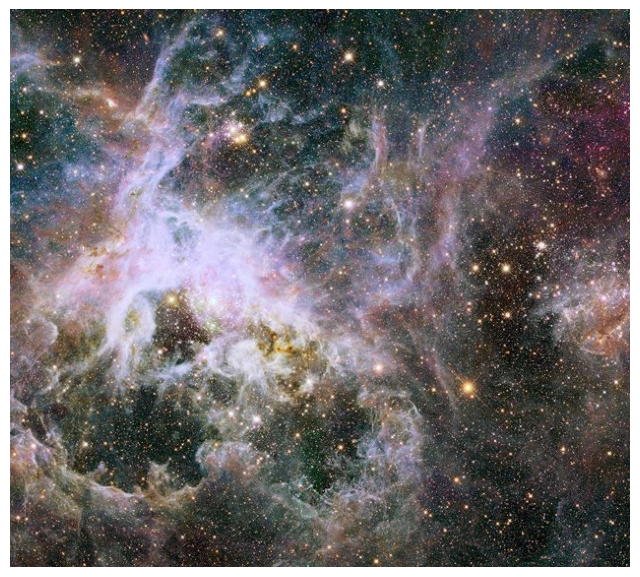

In [5]:
img = plt.imshow(A)
plt.axis('off')

Convert the picture to gray-scale and visualize it.

In [6]:
X = np.mean(A, axis=2)

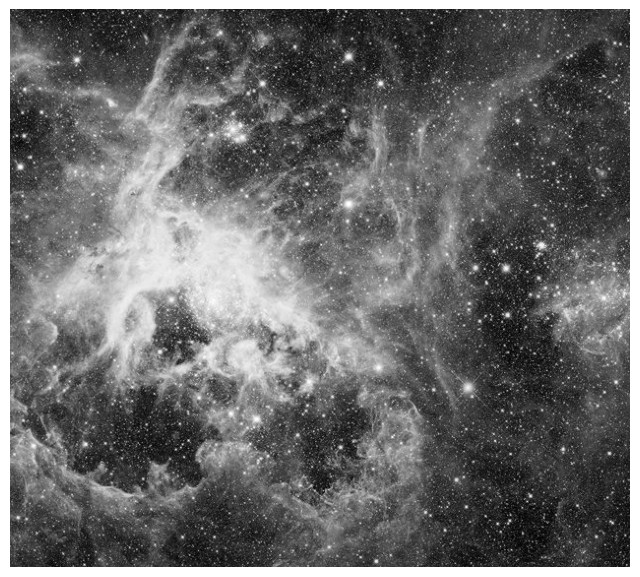

In [7]:
img = plt.imshow(X)
plt.axis('off')
img.set_cmap('gray')
plt.show()

What is the picture size?

In [8]:
X.shape

(567, 630)

Perform the SVD decomposition

In [14]:
U, s, VT = np.linalg.svd(X, full_matrices = False)

U.shape, s.shape, VT.shape

((567, 567), (567,), (567, 630))

Plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

Text(0.5, 1.0, 'Explained variance')

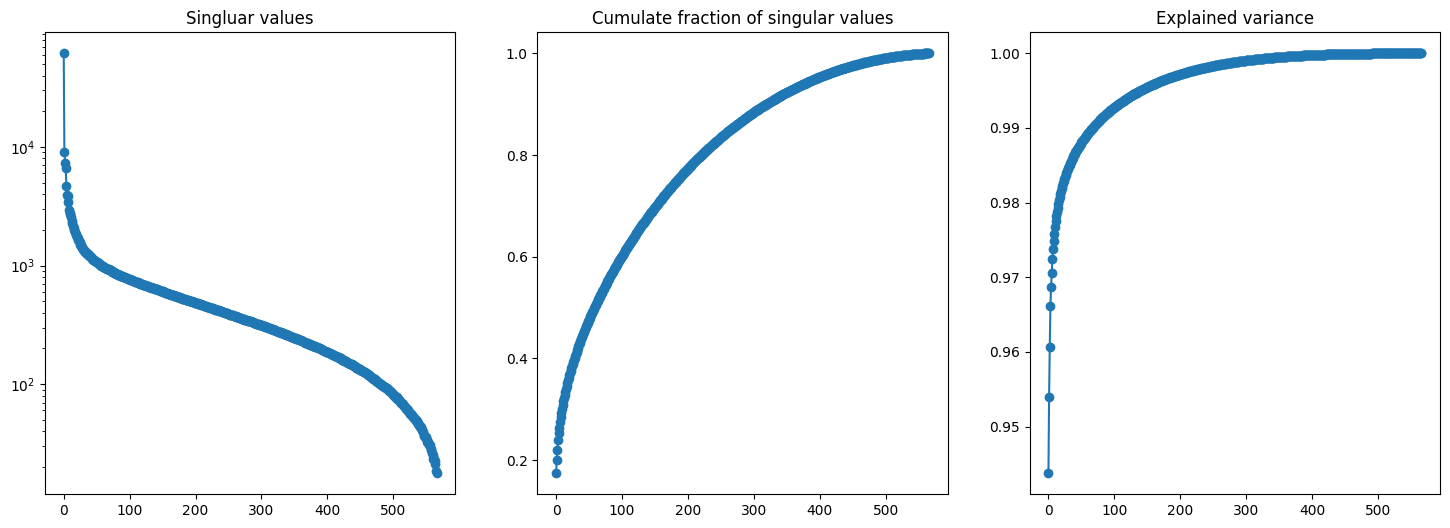

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (18,6))

axes[0].semilogy(s, 'o-')
axes[0].set_title('Singluar values')

axes[1].plot(np.cumsum(s)/np.sum(s), 'o-')
axes[1].set_title('Cumulate fraction of singular values')

axes[2].plot(np.sqrt(np.cumsum(s**2)/np.sum(s**2)), 'o-')
axes[2].set_title('Explained variance')

Visualize the best rank-$k$ matrices, for $k$ = 1, 5, 10, 50, 100, 500

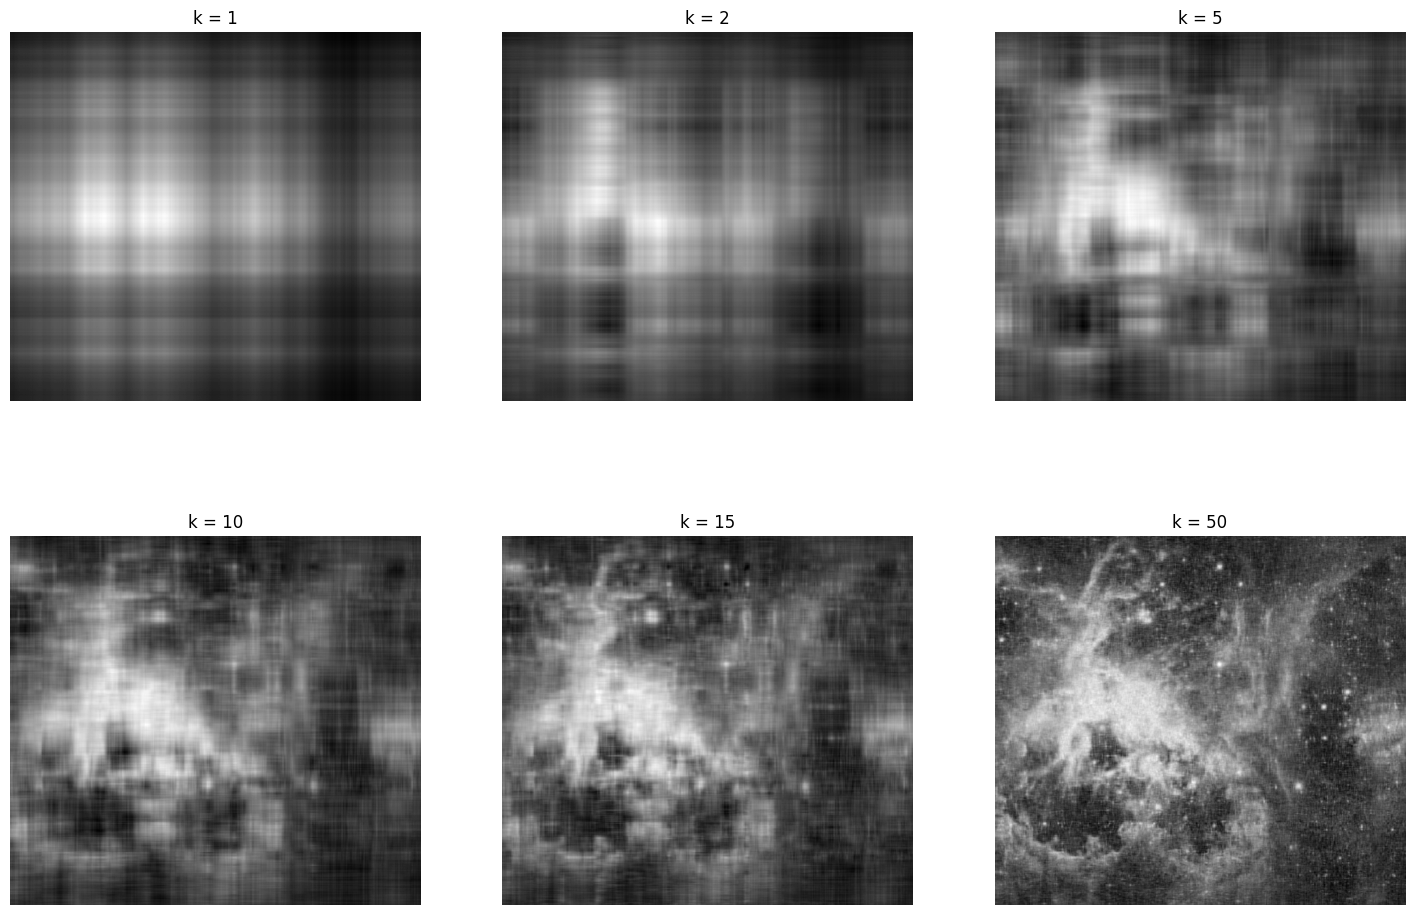

In [33]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (18,12))
axs = axs.reshape((-1,))
idxs = [1, 2, 5, 10, 15, 50]
for i in range(len(idxs)):
  k = idxs[i]
  X_k = np.matmul(U[:,:k], np.matmul(np.diag(s[:k]),VT[:k,:]))
  axs[i].imshow(X_k, cmap='gray')
  axs[i].set_title(f'k = {k}')
  axs[i].axis('off')


Visualize the $k$-th rank-1 matix, for $k$ = 1,2,...,6

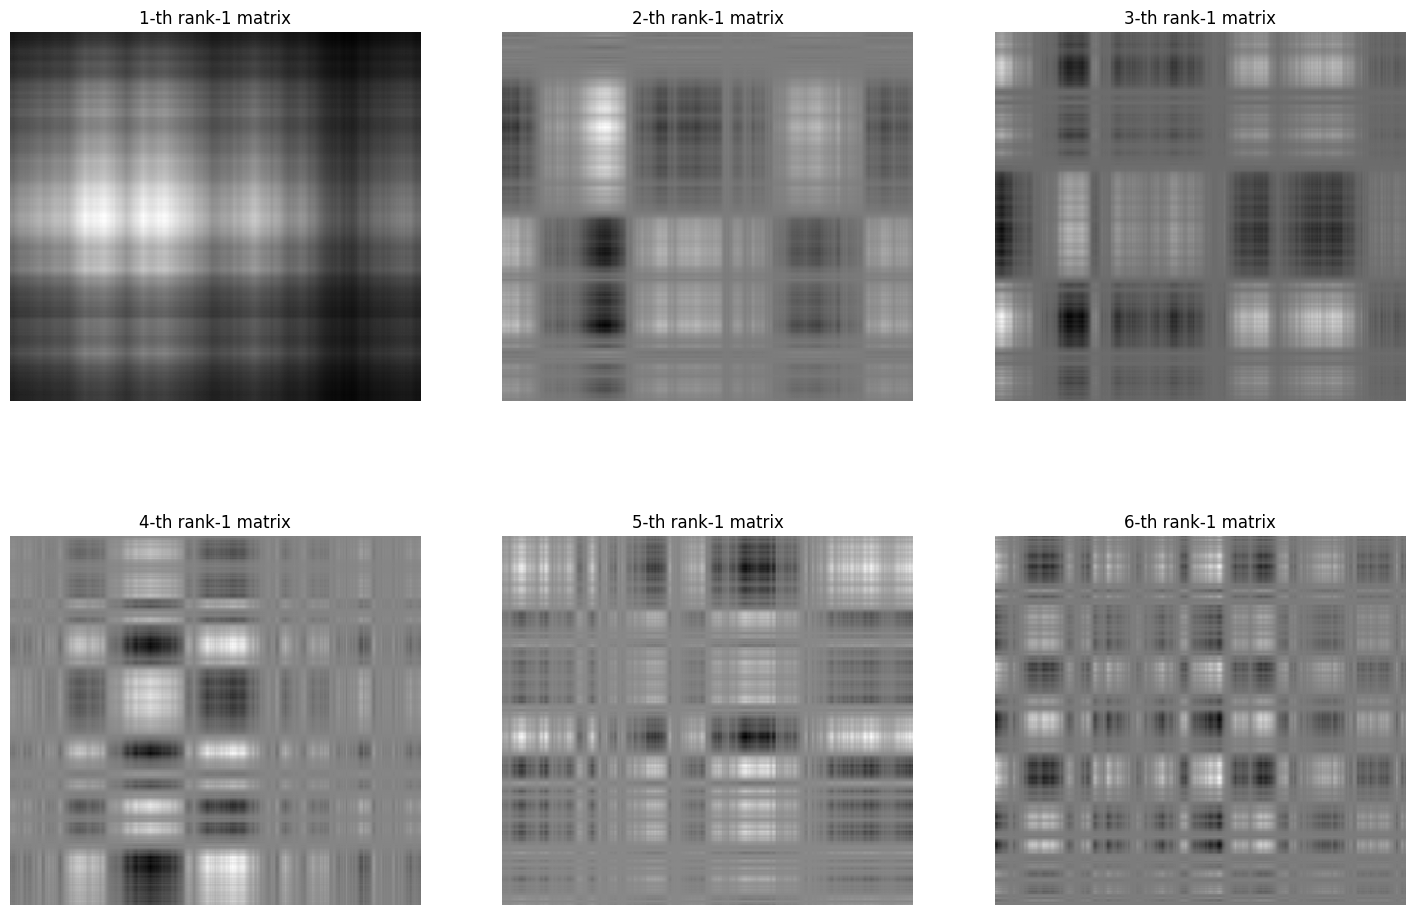

In [34]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (18,12))
axs = axs.reshape((-1,))
idxs = [1,2,3,4,5,6]
for i in range(len(idxs)):
  k = idxs[i]
  ukvk = np.outer(U[:,k - 1], VT[k - 1,:])
  axs[i].imshow(ukvk, cmap="gray")
  axs[i].set_title(f'{k}-th rank-1 matrix')
  axs[i].axis('off')


## Randomized SVD

Implement now a function that computes the randomized SVD of rank $k$ of a generic matrix $A$.

In [35]:
import numpy as np
from numpy import linalg as LA

def randomized_SVD(A, k):
  m, n = A.shape
  P = np.random.randn(n, k)

  Z = A @ P

  Q, R = LA.qr(Z)

  Y = Q.T @ A

  assert Y.shape == (k, n)

  U, Shap, VThat = LA.svd(Y, full_matrices = False)

  Uhat = Q @ U

  assert Uhat.shape == (m, k)
  assert Shap.shape == (k,)
  assert VThat.shape == (k, n)

  return Uhat, Shap, VThat

Set $k=100$ and compute the randomized SVD of the picture used above.

In [27]:
k = 175
Urand, Srand, VTrand = randomized_SVD(X, k)

Plot the approximate singular values, their cumulate values and their cumulate squares, with a comparison of the ones obtained with the "exact" (i.e. non randomized) SVD.

Text(0.5, 1.0, 'Explained variance')

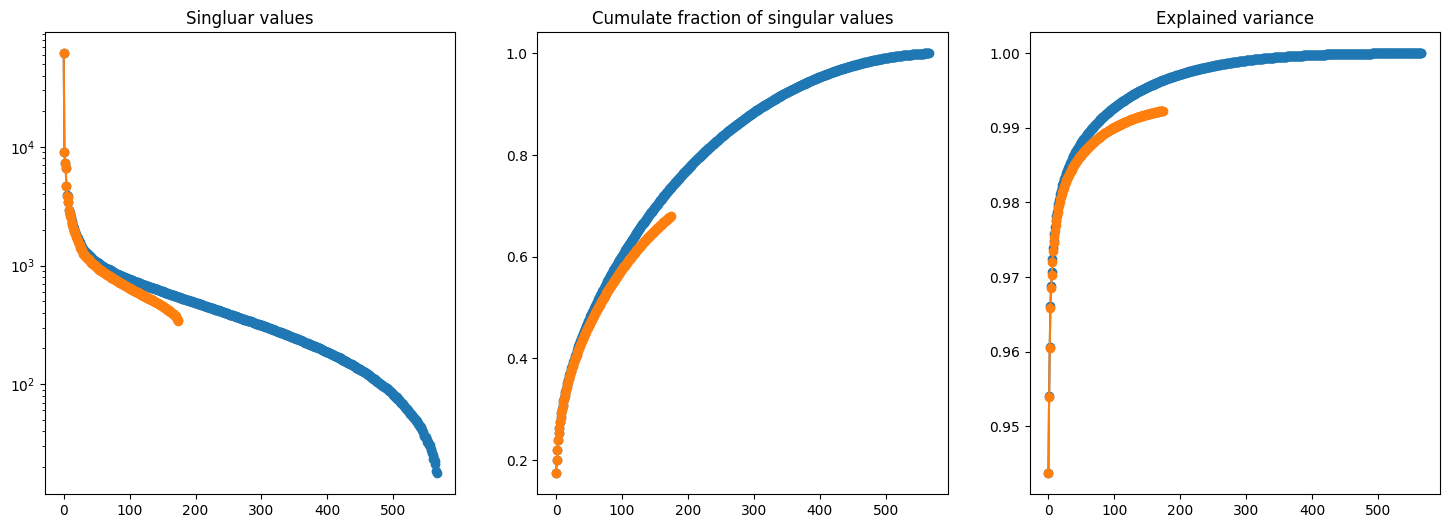

In [31]:
#We see that we are approximating very well the first singular values.
#To have better precision we have to increase k

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].semilogy(s, 'o-')
axes[0].semilogy(Srand, 'o-')
axes[0].set_title('Singluar values')

axes[1].plot(np.cumsum(s)/np.sum(s), 'o-')
axes[1].plot(np.cumsum(Srand)/np.sum(s), 'o-')
axes[1].set_title('Cumulate fraction of singular values')

axes[2].plot(np.sqrt(np.cumsum(s**2)/np.sum(s**2)), 'o-')
axes[2].plot(np.sqrt(np.cumsum(Srand**2)/np.sum(s**2)), 'o-') #We normalize by np.sum(S**2) otherwise the graphs would be shifted
axes[2].set_title('Explained variance')

Compare the original picture with the best rank-$k$ matrix obtained through SVD and the best rank-$k$ matrix obtained through randomized SVD.

In [29]:
Urand.shape

(567, 175)

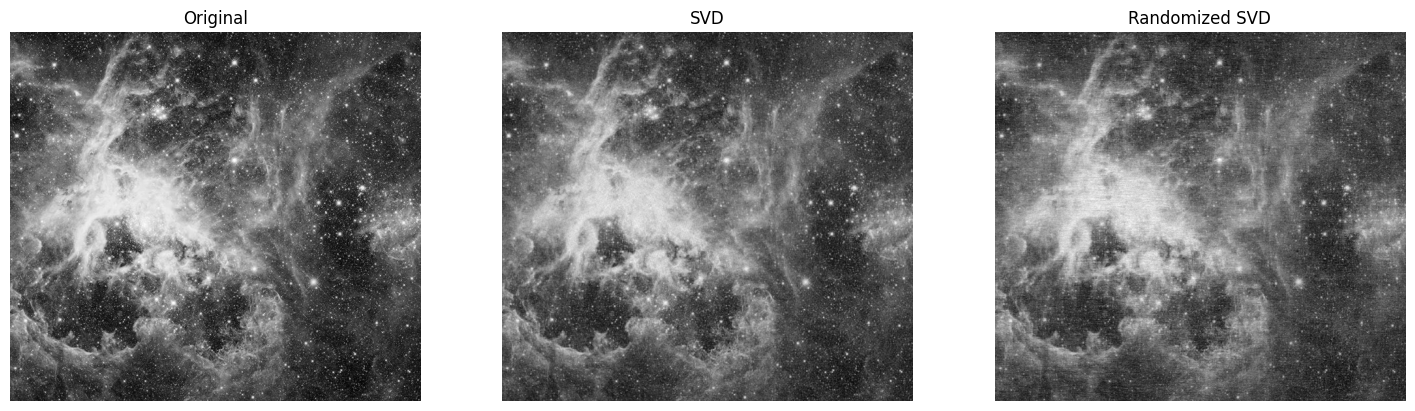

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

k = 150

axs[0].imshow(X, cmap='gray')
axs[0].set_title('Original')

axs[1].imshow(np.matmul(U[ : , :k], np.matmul(np.diag(s[:k]), VT[:k, : ])), cmap = "gray")
axs[1].set_title('SVD')

axs[2].imshow(Urand @ np.diag(Srand) @ VTrand, cmap = "gray")
axs[2].set_title('Randomized SVD')

for ax in axs:
  ax.axis('off')

#Or
#for i in range(3):
  #axs[i].set_axis_off()